# US Census Income Predicting and Analysing

#### Aim of this predicting project is to predict the income of people living in US based on dataset features that we have. The dataset is the "Census income" dataset, which was extracted from the machine learning repository (UCI).

***Columns informations:***

|Column Name|Type|Description|
|-----------|----|-----------|
|age|int64|The age of a person|
|workclass|object|A general term to represent the employment status of a person|
|fnlwgt|int64|Final weight: is the number of people the census believes the entry represents|
|education|object|The highest level of education achieved by a person|
|education_num|int|The highest level of education achieved in numerical form|
|marital-status|object|Marital status of a person|
|occupation|object|The general type of occupation of a person|
|relationship|object|Represents what this individual is relative to others|
|race|object|Descriptions of a person’s race|
|sex|object|The biological sex of the individual|
|capital-gain|int64|Capital gains for a person|
|capital-loss|int64|Capital loss for a person|
|hours-per-week|int64|The hours a person has reported to work per week|
|native-country|object|Country of origin for a person|
|income|object|The label whether or not a person|

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
# libraries form modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# load dataset
data = pd.read_csv('dataset/income_dataset.csv')
# also can load .data file for dataset
# data = pd.read_csv('dataset/income_dataset.data')
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
data.shape

(32561, 15)

**Two questions asked here:**
<ol>
    <li>Does a person makes more than 50K dollar or not? </li>
    <li>What is the most important feature for predictiong income?</li>
    </ol>

In [4]:
print(f'number of null values: {data.isnull().sum().sum()}')
print('-'*60)
print(data.info())

number of null values: 0
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


## Cleaning dataset

In [5]:
# drop education because it is same as education_num column.
data.drop('education', axis=1, inplace=True)

The matching education level of the education number:
<ul>
    <li> 1 - Preschool</li>
    <li> 2 - 1st-4th</li>
    <li> 3 - 5th-6th</li>
    <li> 4 - 7th-8th</li>
    <li> 5 - 9th</li>
    <li> 6 - 10th</li>
    <li> 7 - 11th</li>
    <li> 8 - 12th</li>
    <li> 9 - HS-grad</li>
    <li> 10 - Some-college</li>
    <li> 11 - Assoc-voc</li>
    <li> 12 - Assoc-acdm</li>
    <li> 13 - Bachelors</li>
    <li> 14 - Masters</li>
    <li> 15 - Prof-school</li>
    <li> 16 - Doctorate</li>
</ul>

In [6]:
# split categorical columns and numerical columns
cat_cols = data.select_dtypes(include='object')
num_cols = data.select_dtypes(include='int64')

In [7]:
print('Number of duplicates')
print('before drop duplicates: ',data.duplicated().sum())
data = data.drop_duplicates()
print('after drop duplicates: ',data.duplicated().sum())

Number of duplicates
before drop duplicates:  24
after drop duplicates:  0


In [8]:
# strip all categorical columns
for i in cat_cols:
    data[i] = data[i].str.strip()

In [9]:
# want to see inside of each categorical columns values
for i in cat_cols:
    print(i)
    print('-'*50)
    print(data[i].value_counts())
    print('-'*50)
    print('-'*50)

workclass
--------------------------------------------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------
--------------------------------------------------
marital_status
--------------------------------------------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
--------------------------------------------------
--------------------------------------------------
occupation
--------------------------------------------------
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical 

In [10]:
cols_with_question_mark = ['workclass', 'occupation', 'native_country']
for i in cols_with_question_mark:
    data[i] = data[i].replace({'?':'unknown'})

In [11]:
upper_income = data[data['income']=='<=50K'].shape[0] 
lower_income = data[data['income']=='>50K'].shape[0]
print(f'number of higher income: {upper_income}')
print(f'number of lower income: {lower_income}')

number of higher income: 24698
number of lower income: 7839


## Exploration on dataset

In [12]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
data_counts = data.groupby(['education_num', 'income']).size()
data_counts = data_counts.reset_index(name='count')
data_counts = data_counts.pivot(index='education_num', columns='income', values='count').fillna(0)

In [14]:
data_counts

income,<=50K,>50K
education_num,,
1,50.0,0.0
2,160.0,6.0
3,316.0,16.0
4,605.0,40.0
5,487.0,27.0
6,871.0,62.0
7,1115.0,60.0
8,400.0,33.0
9,8820.0,1674.0


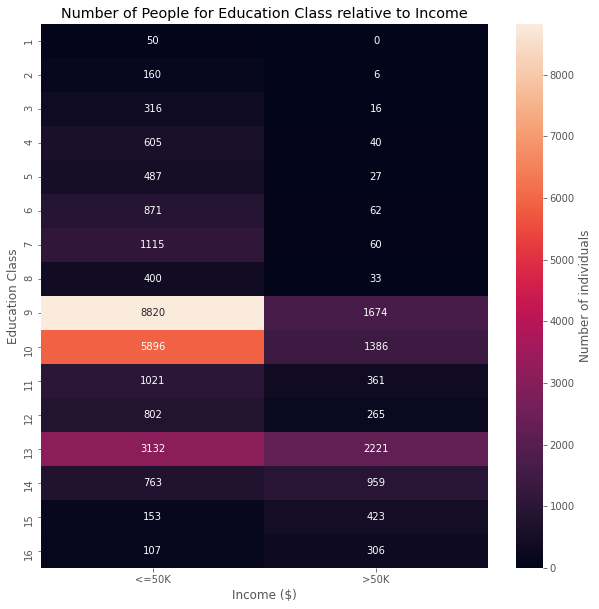

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data_counts, annot=True, fmt='.0f', cbar_kws={'label':'Number of individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class')
plt.show()

- In the graph above, we can see that people with education classes of 9 & 10 make up the highest portion in the dataset. Also, we notice that people with education class of 14 to 16 proportionally usually make >50k as income in the statistics we have in the dataset, unlike lesser education classes where they usually make <=50k as income.

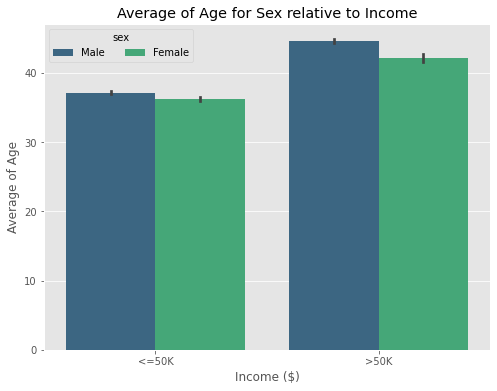

In [16]:
# a bar plot on income and age based on column 'sex'
plt.figure(figsize=(8,6))
ax = sns.barplot(data=data, x='income', y='age', hue='sex', palette='viridis')
ax.legend(loc=2, ncol=3, title='sex',framealpha=1)
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age')
plt.show()

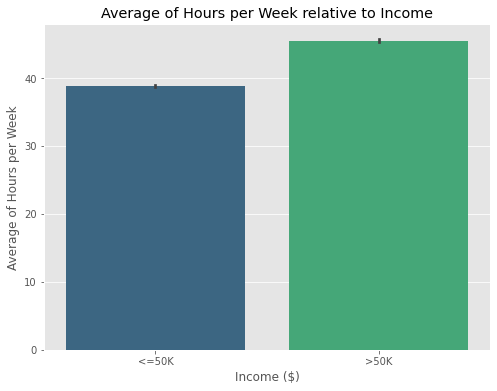

In [17]:
# bar plot for hours working in a week with income
plt.figure(figsize=(8,6))
sns.barplot(data=data, x='income', y='hours_per_week', palette='viridis')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week')
plt.show()

## Preprocessing data

In [18]:
# make a copy of dataset for doing preprocessing and modeling
datas = data.copy()
datas.head(1)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


##### Scaling

In [19]:
# scaling data with min max scaler in range 0 to 1, to prepare them for model.
num_cols_for_scale = num_cols.drop('education_num', axis=1) # shouldn't scale 'educational_num' column
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas[num_cols_for_scale.columns] = scaler.fit_transform(datas[num_cols_for_scale.columns])
datas.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


##### Encoding

In [20]:
# replace binary categorical columns with 0 and 1
datas['sex'] = datas['sex'].replace({'Female':0, 'Male':1})
datas['income'] = datas['income'].replace({'<=50K': 0, '>50K': 1})

In [21]:
# use get_dummies for one-hot encoding categorical columns.
datas = pd.get_dummies(datas)

*also can use sklearn OneHotEncoder method for this*

In [22]:
# shape of datas after one-hot encoding
datas.shape

(32537, 92)

## Modeling

In [23]:
# split input and output data
x = datas.drop('income', axis=1)
y = datas['income']
# split datas into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Because dataset has more <=50K data than >50K. dataset is imbalaced so we want to balanced them with a library based on scikit learn called imbalanced learn.**

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x, y)
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [25]:
# define models
log_reg = LogisticRegression()
rnd_frst = RandomForestClassifier()

In [26]:
def predicted(model, x, y, xtest, ytest):
    model.fit(x, y)
    y_pred = model.predict(xr_test)
    mse = np.sqrt(mean_squared_error(ytest, y_pred))
    acc = accuracy_score(ytest, y_pred)
    return mse, acc

In [27]:
regmse, regacc = predicted(log_reg, xr_train, yr_train, xr_test, yr_test)
rndmse, rndacc = predicted(rnd_frst, xr_train, yr_train, xr_test, yr_test)

In [28]:
compare_dict = {'MSE':[regmse, rndmse],
       'Accuracy':[regacc*100, rndacc*100]}
compare = pd.DataFrame(compare_dict, index=['LogisticRegression', 'RandomForest'])
# a data frame for compare models metrics
compare

,MSE,Accuracy
LogisticRegression,0.433305,81.224696
RandomForest,0.265606,92.945344


<code style='background:yellow;color:black'>RandomForest classifier without any tuning is worked better than LogisticRegression about 11 percent in accuracy</code>

## Feature Importance

**In this part, we will encode dataset again to have same number of columns with main dataset and fit data again**

In [29]:
dataf = data.copy()
for i in dataf.columns:
    if dataf[i].dtypes == 'object':
        encoder = LabelEncoder()
        dataf[i] = encoder.fit_transform(dataf[i])

dataf.head(2)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,13,2,3,0,4,1,0,0,13,38,0


In [30]:
xf = dataf.drop('income', axis=1)
yf = dataf['income']
# again to have better result for feature importance, balance dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(xf, yf)
xftrain, xftest, yftrain, yftest = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
# fit random forest with data again
clf = RandomForestClassifier()
clf.fit(xftrain, yftrain)
acc = accuracy_score(yftest, clf.predict(xftest))
print('Accuracy here is : {}'.format(acc*100))

Accuracy here is : 93.12753036437246


In [32]:
# make a dataframe to have features and features importance together
feature_imp_df = pd.DataFrame({'Features': xf.columns,
                  'Feature Importance': clf.feature_importances_*100})
feature_imp_df.sort_values(['Feature Importance'], ascending=False).reset_index(drop=True)

,Features,Feature Importance
0,age,16.363410
1,fnlwgt,15.104883
2,relationship,12.589197
3,education_num,11.630550
4,marital_status,11.426783
5,hours_per_week,8.117470
6,capital_gain,8.038692
7,occupation,6.170736
8,workclass,3.414843
9,capital_loss,2.579110


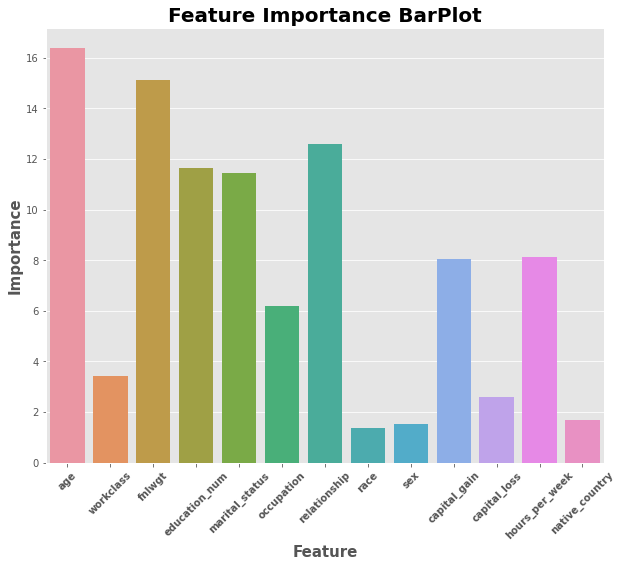

In [33]:
# ploting feature importances
plt.figure(figsize=(10,8))
sns.barplot(data=feature_imp_df, x='Features', y='Feature Importance')
plt.title('Feature Importance BarPlot', weight='bold', fontsize=20)
plt.xticks(rotation=45, weight='bold')
plt.xlabel('Feature', weight='bold', fontsize=15)
plt.ylabel('Importance', weight='bold', fontsize=15)
plt.show()

**Based on this importances we can remove some of features such <mark style='background:yellow;color:black'>race, sex, capital loss, native country</mark>**